In [1]:
from glob import glob
from itertools import cycle

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import librosa
import IPython.display as ipd

In [2]:
sns.set_theme(style='white', palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(color_pal)

In [3]:
glob('./*')

['.\\Audio Data Processing in Python 2022.ipynb',
 '.\\Extracting Audio from Video using Python.ipynb',
 '.\\test.mkv',
 '.\\test.mp3',
 '.\\test.wav',
 '.\\youtube']

In [4]:
path = 'test.mp3'

In [5]:
ipd.Audio(path)

In [7]:
y, sr = librosa.load(path)

In [8]:
print(y[:10])
print(y.shape)
print(sr)

[ 3.5731978e-07  4.1382219e-07  3.7961195e-07 -5.8067207e-07
 -1.6841341e-07 -9.5606129e-07 -6.3263400e-08  4.8348380e-08
  4.1299941e-07  8.8632765e-07]
(204404,)
22050


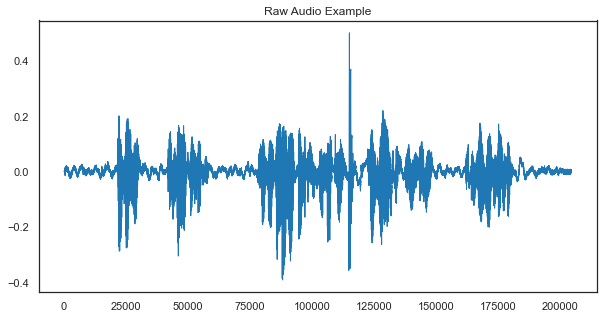

In [9]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw Audio Example', color=color_pal[0])
plt.show()

In [10]:
yt, index = librosa.effects.trim(y, top_db=20)
print(librosa.get_duration(y=y), librosa.get_duration(y=yt))

9.27002267573696 7.476825396825397


<AxesSubplot:title={'center':'Raw Audio Example'}>

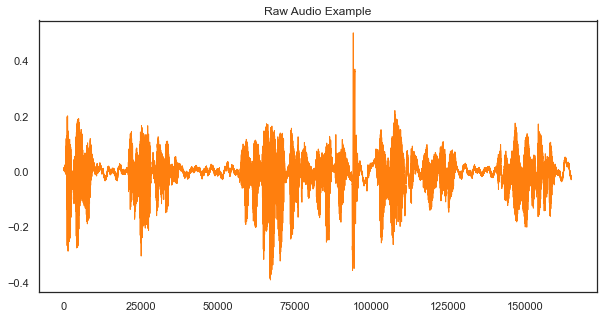

In [11]:
pd.Series(yt).plot(figsize=(10, 5), lw=1, title='Raw Audio Example', color=color_pal[1])

In [37]:
intervals = librosa.effects.split(y, top_db=20)
intervals

array([[ 20992,  31232],
       [ 41984,  56320],
       [ 78336, 136704],
       [137216, 149504],
       [162304, 180736],
       [182784, 185856]])

In [45]:
start, end = intervals[0]
print(start, end)

20992 31232


<AxesSubplot:title={'center':'Raw Audio Example'}>

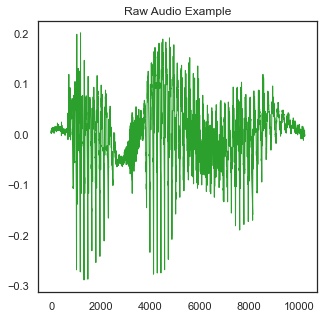

In [43]:
pd.Series(y[start:end]).plot(figsize=(5, 5), lw=1, title='Raw Audio Example', color=color_pal[2])

In [39]:
ipd.Audio(path)

In [40]:
ipd.Audio(data=y[intervals[0][0]:intervals[0][1]], rate=sr)

In [41]:
ipd.Audio(data=y[intervals[1][0]:intervals[1][1]], rate=sr)

In [42]:
ipd.Audio(data=y[intervals[2][0]:intervals[2][1]], rate=sr)